In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [11]:
red_wine_df = pd.read_csv("winequality-red.csv", sep=';')
white_wine_df = pd.read_csv("winequality-white.csv", sep=';')
random_white_df = white_wine_df.sample(1599,random_state=1).reset_index(drop=True)
baseline_red_df = red_wine_df.copy()
baseline_white_df = random_white_df.copy()
only_balanced_df = pd.concat([baseline_red_df, baseline_white_df])
only_balanced_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,5.4,0.29,0.38,1.2,0.029,31.0,132.0,0.98895,3.28,0.36,12.4,6
1595,6.3,0.41,0.33,4.7,0.023,28.0,110.0,0.99100,3.30,0.38,12.5,7
1596,6.8,0.29,0.32,1.8,0.032,18.0,130.0,0.99095,3.05,0.62,11.2,6
1597,6.3,0.36,0.28,2.5,0.035,18.0,73.0,0.98868,3.10,0.47,12.8,7


In [18]:
color_red_df = red_wine_df.copy()
color_white_df = random_white_df.copy()
color_red_df["color"] = "red"
color_white_df["color"] = "white"
colors_df = pd.concat([color_red_df, color_white_df])

In [19]:
#if we only want to use the balanced data and include the colors of wine:
dummy_colors_df = pd.get_dummies(colors_df, columns=['color'])
dummy_drop_colors_df = dummy_colors_df.drop(columns=["color_red"]).copy()
dummy_rename_colors_df = dummy_drop_colors_df.rename(columns={"color_white":"colors"})
dummy_rename_colors_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colors
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,5.4,0.29,0.38,1.2,0.029,31.0,132.0,0.98895,3.28,0.36,12.4,6,1
1595,6.3,0.41,0.33,4.7,0.023,28.0,110.0,0.99100,3.30,0.38,12.5,7,1
1596,6.8,0.29,0.32,1.8,0.032,18.0,130.0,0.99095,3.05,0.62,11.2,6,1
1597,6.3,0.36,0.28,2.5,0.035,18.0,73.0,0.98868,3.10,0.47,12.8,7,1


In [2]:
df = pd.read_csv("winequality-red.csv", sep=';')
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
# Set features. Drop quality, y value. 
X = dummy_rename_colors_df.drop(columns='colors')
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
from sklearn.model_selection import train_test_split
#80% train, 20% test. y is this one column
y = dummy_rename_colors_df['colors']
#random state 42 will have same picks for x test and y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.926
k: 3, Train/Test Score: 0.956/0.931
k: 5, Train/Test Score: 0.944/0.926
k: 7, Train/Test Score: 0.934/0.926
k: 9, Train/Test Score: 0.930/0.926
k: 11, Train/Test Score: 0.925/0.920
k: 13, Train/Test Score: 0.918/0.914
k: 15, Train/Test Score: 0.918/0.917
k: 17, Train/Test Score: 0.918/0.917
k: 19, Train/Test Score: 0.917/0.917


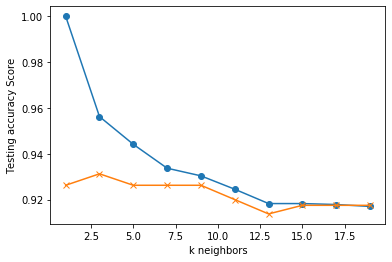

In [45]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [58]:
# Note that k: 17 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

k=3 Test Acc: 0.931
